Naive-Bayes.



In [11]:
import pandas as pd
df=pd.read_csv('data/spam.csv', encoding='latin')  #指定编码格式

print(df.head())

  label                                               text Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [12]:
#把‘ham’和‘spam’标签重命名为0和1
df['numlabel']=df['label'].map({'ham':0,'spam':1})
print(df.head())

  label                                               text Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  numlabel  
0        NaN        NaN         0  
1        NaN        NaN         0  
2        NaN        NaN         1  
3        NaN        NaN         0  
4        NaN        NaN         0  


In [13]:
#进行类别计数
print(df['numlabel'].value_counts())
print(len(df['numlabel']))

0    4825
1     747
Name: numlabel, dtype: int64
5572


In [18]:
#统计文本长度
text_lengths=[len(df.loc[i,'text']) for i in range(len(df))]
print('the minimum length is:%d\n'%(min(text_lengths)),
      'the maximum length is:%d'%(max(text_lengths))
      )

the minimum length is:2
 the maximum length is:910


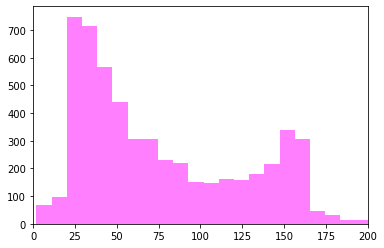

In [19]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.hist(text_lengths,100,facecolor='magenta',alpha=0.5) #其中100是指定有多少条条形
plt.xlim([0,200])
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer #构建文本的向量（基于词频的表示）
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(df.text)
y=df.numlabel
print(x.shape)

(5572, 8672)


In [21]:
#把数据分为训练集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

print('训练集种的样本量：%d'%x_train.shape[0],'测试集种的样本量：%d'%x_test.shape[0])

训练集种的样本量：4457 测试集种的样本量：1115


In [22]:
#利用朴素贝叶斯进行训练
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
clf=MultinomialNB(alpha=1.0,fit_prior=True)
clf.fit(x_train,y_train)
y_pred_1=clf.predict(x_test)
print('朴素贝叶斯')
print(accuracy_score(y_test,y_pred_1),roc_auc_score(y_test,y_pred_1))
print(recall_score(y_test,y_pred_1),precision_score(y_test,y_pred_1),f1_score(y_test,y_pred_1))

朴素贝叶斯
0.9811659192825112 0.9678205128205127
0.95 0.9047619047619048 0.9268292682926829


tf-idf表示

不仅考虑词语在文本中出现的次数，进一步考虑词语的重要性，认为出现次数越多越不重要。

词频 (term frequency, TF)指的是某一个给定的词语在该文件中出现的次数。这个数字通常会被归一化(一般是词频除以文章总词数), 以防止它偏向长的文件。


逆向文件频率 (inverse document frequency, IDF)IDF的主要思想是：如果包含词条t的文档越少, IDF越大，则说明词条具有很好的类别区分能力。某一特定词语的IDF，可以由总文件数目除以包含该词语之文件的数目，再将得到的商取对数得到。



某一特定文件内的高词语频率，以及该词语在整个文件集合中的低文件频率，可以产生出高权重的TF-IDF。因此，TF-IDF倾向于过滤掉常见的词语，保留重要的词语。


特征是实数型。



In [23]:
#利用tf-idf从文本中提取特征,写到数组里
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df.text)
Y=df.numlabel
print(X.shape)

(5572, 8672)


In [24]:
#把数据分为训练集和测试集
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
print('训练集种的样本量：%d'%X_train.shape[0],'测试集种的样本量：%d'%Y_test.shape[0])


训练集种的样本量：4457 测试集种的样本量：1115


In [25]:
CLF = MultinomialNB()
# 利用朴素贝叶斯做训练
CLF.fit(X_train, Y_train)
Y_pred_1 = CLF.predict(X_test)
print('朴素贝叶斯')
print("accuracy on test data: ", accuracy_score(Y_test, Y_pred_1),roc_auc_score(Y_test, Y_pred_1))


朴素贝叶斯
accuracy on test data:  0.9614349775784753 0.8464285714285714
